# PW 1 - Markovian models  
### de Menezes Lima, Marina

Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

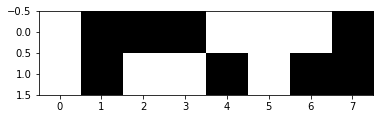

In [2]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 


For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1 

Following the Hammersley-Clifford theorem , the global energy is given by 
\begin{equation}
U(x) = \sum_{c\epsilon C} V_c(x)
\end{equation}
So, evaluating the image, we have that $U(x) = 8\beta + 4\beta = 12 \beta$, being $8\beta$ the result coming from the horizontal analysis and $4\beta$ the vertical analysis.


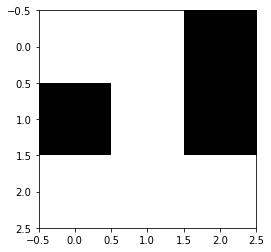

In [3]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2

The general form of the local conditional probability in a pixel s is:

\begin{equation}
\mathbb{P}(X_s = x_s/V_s) = \frac{1}{Z^{s}} exp - U_s(x_s,V_s) 
\end{equation}


The 2 local conditional energies are: 
\begin{equation}
U(0|V_s) = 5\beta
\end{equation}

\begin{equation}
U(1|V_s) = 3\beta
\end{equation}

So, the local conditional probabilities are:
\begin{equation}
P(X_s = 0|V_s) = e^{-5\beta}/Z_s
\end{equation}

\begin{equation}
P(X_s = 1|V_s) = e^{-3\beta}/Z_s
\end{equation}

So,
\begin{equation}
P(X_s = 0|V_s) + P(X_s = 1|V_s) = 1 -> \frac{e^{-5\beta}}{Z_s} + \frac{e^{-3\beta}}{Z_s} = 1 -> Z_s = e^{-5\beta}+e^{-3\beta}.
\end{equation}

The most probable class is $\hat x_s = 1 $ because its energy $U_s$ is smaller, therefore its conditional probability is larger.


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



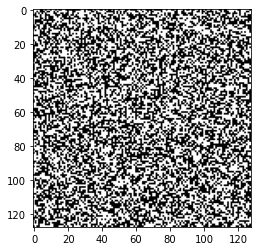

In [4]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [21]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=0
            if (im_bin[i1][j]==1):
                Ureg0+=beta_reg
            if (im_bin[i2][j]==1):
                Ureg0+=beta_reg
            if (im_bin[i][j1]==1):
                Ureg0+=beta_reg
            if (im_bin[i][j2]==1):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);         
        
        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=0
            if (im_bin[i1][j]==0):
                Ureg1+=beta_reg
            if (im_bin[i2][j]==0):
                Ureg1+=beta_reg
            if (im_bin[i][j1]==0):
                Ureg1+=beta_reg
            if (im_bin[i][j2]==0):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

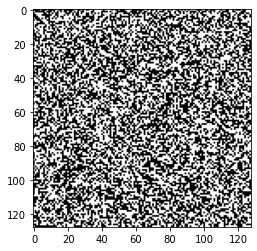

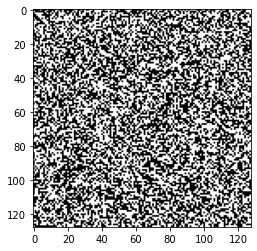

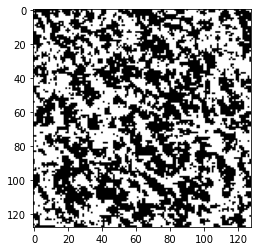

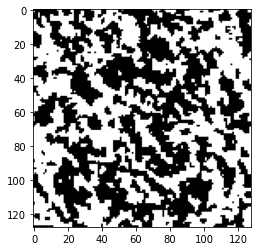

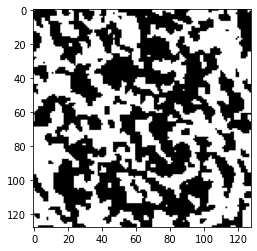

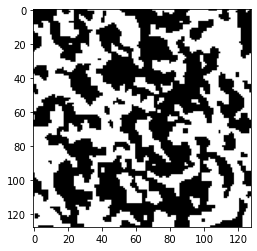

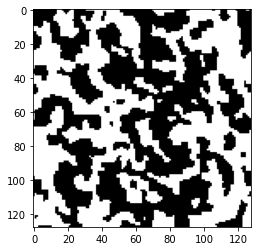

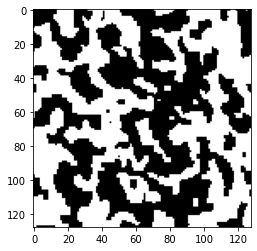

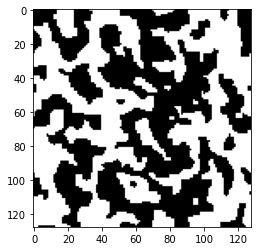

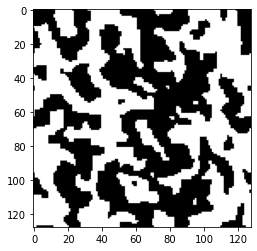

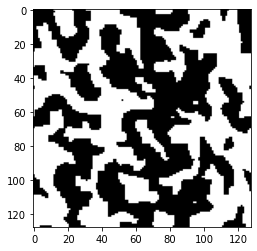

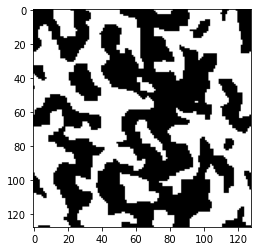

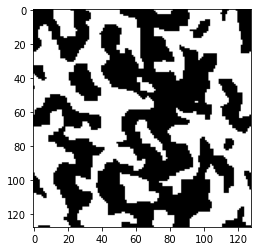

In [28]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

Each time we run the program we get a different image because it follows a estotatisque model and varies with each image.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results. 

#A4

For a small value of $\beta$, the images do not varie a lot from one another and so the final image still has a lot of random values. As we increase $\beta$, the images become more homogeneous and with bigger 'patches', which is the result coherent to the model that values homogeneity.

#Q5 
Which image minimizes the overall energy for this model? 

#A5

The image that minimizes the overall energy for this model are the ones where all the pixels are equal to 1 or all the pixels are equal to 0.


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6

When we use a negative $\beta$ the final image has a lot of black and white pixels alternating with each other. This happens because when we choose a negative $\beta$, we reverse which class has the maximum energy. This way, if the pixel that we want to estimate has more class 1 neighbors, the class 1 energy is going to be greater, so it is going to have a higher probability of being predicted as class 0, and so on. Therefore, if we use a negative $\beta$ the image is going to be less homogeneous.

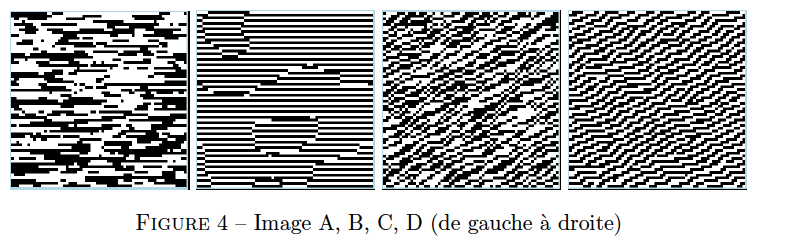

#Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7

* Image A: For this image the clique potential is -1 on the vertical direction.
* Image B: For this image the clique potential is 1 on the horizontal direction.
* Image C: For this image the clique potential is -1 on the 135 degrees diagonal.
* Image D: For this image the clique potential is 1 on the 45 degrees diagonal.

For all the cliques the direction was analized based on the directions where the pixels mostly vary (for the -1 case) or stay mostly uniform (for the 1 case).

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

In [26]:
def echan_diagonal(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg0=0
            if (im_bin[i1][j1]==1):
                Ureg0+=beta_reg
                
            if (im_bin[i2][j2]==1):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 1
            Ureg1=0
            if (im_bin[i1][j1]==0):
                Ureg1+=beta_reg
                
            if (im_bin[i2][j2]==0):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

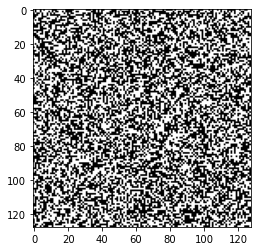

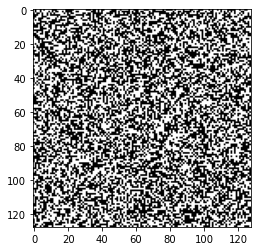

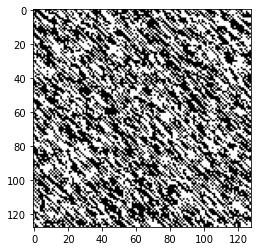

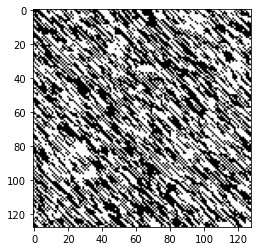

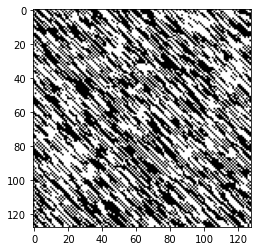

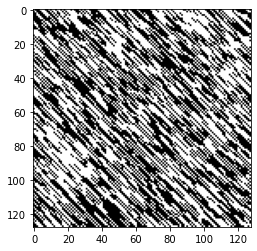

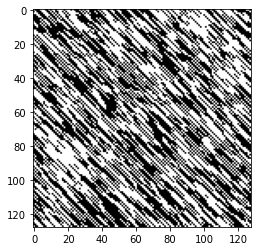

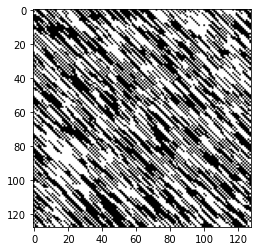

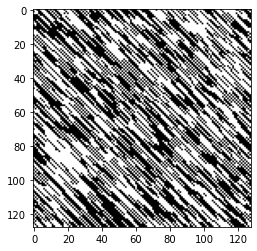

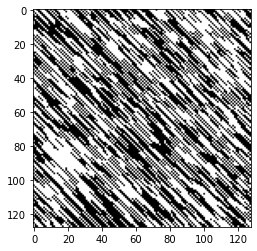

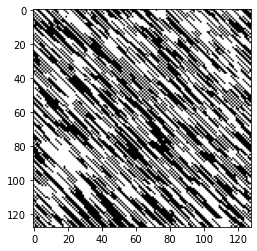

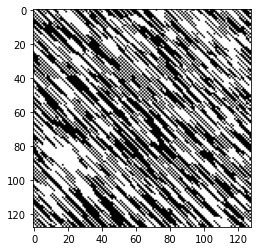

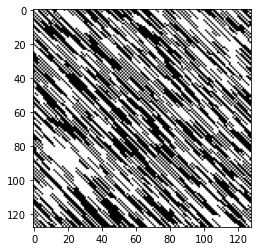

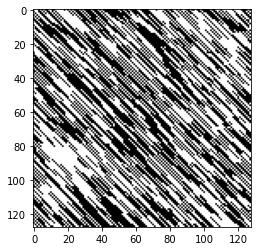

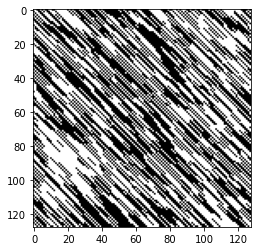

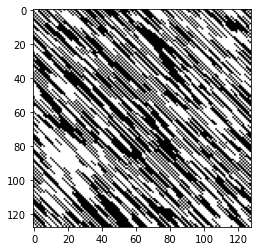

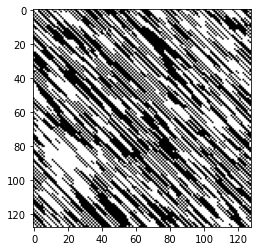

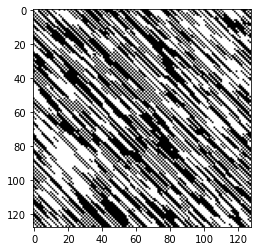

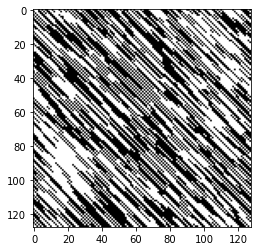

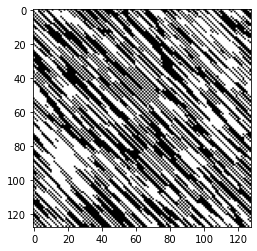

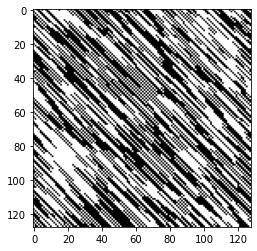

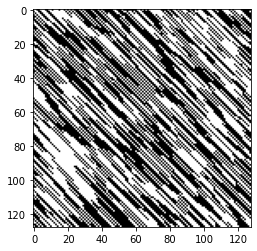

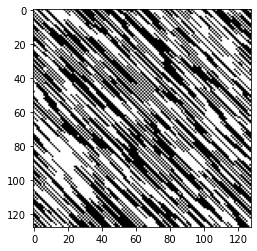

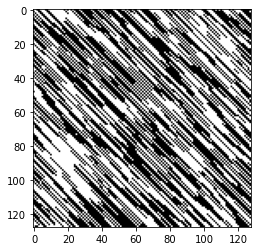

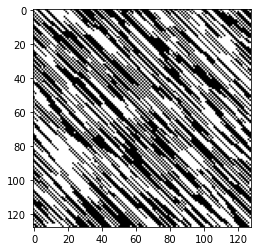

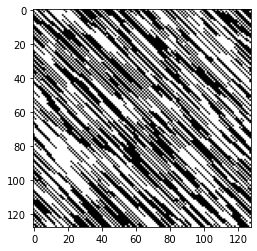

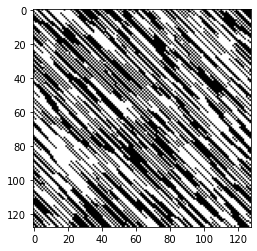

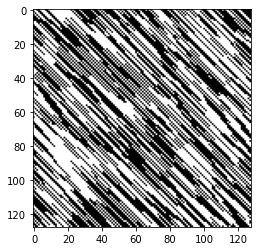

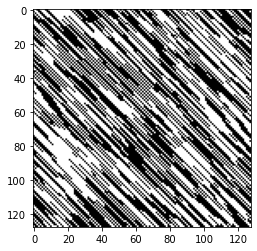

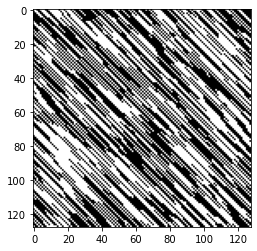

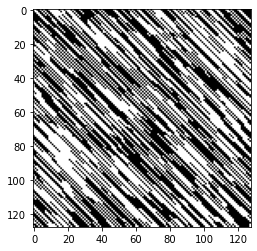

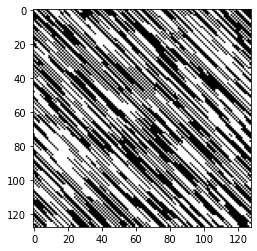

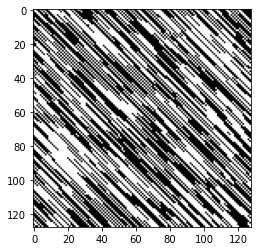

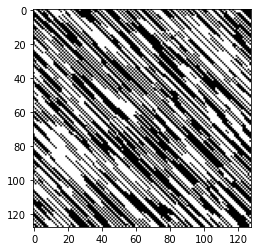

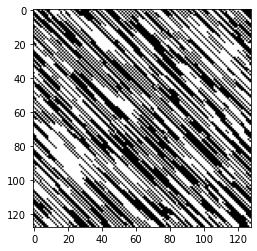

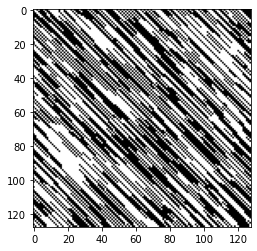

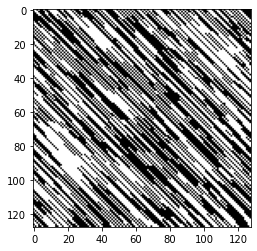

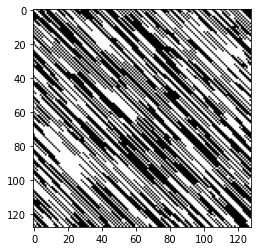

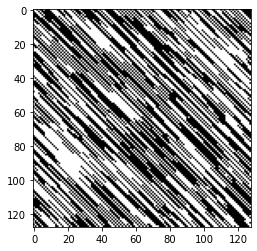

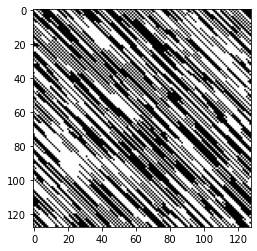

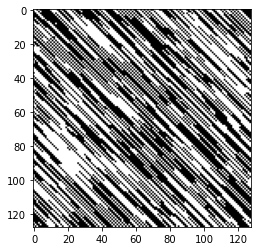

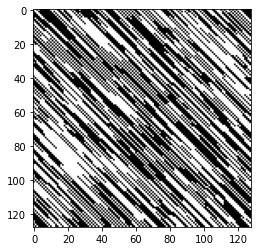

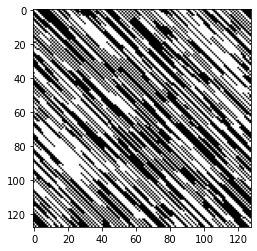

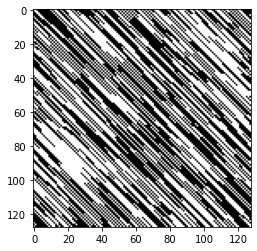

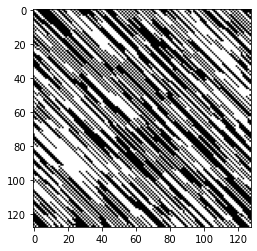

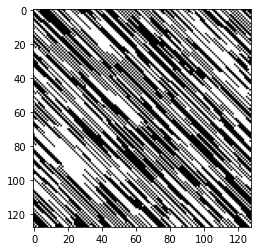

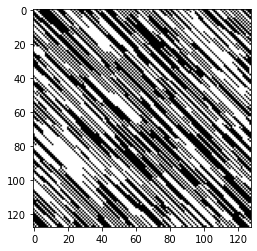

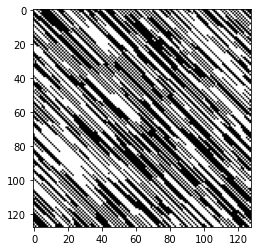

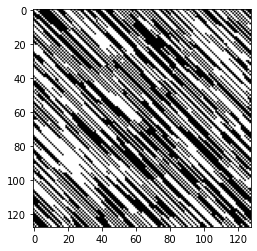

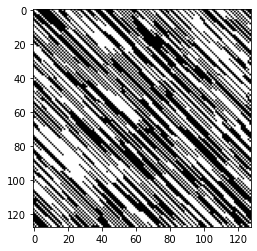

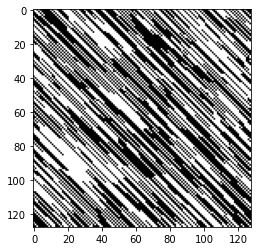

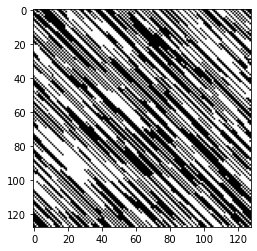

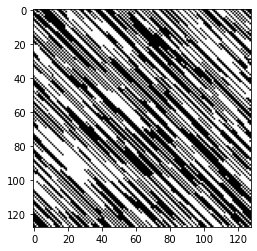

In [27]:
#initialisation aléatoire de im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 5

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echan_diagonal(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#A8

As we defined a model with a diagonal attractive potential only, the final image is composed of black or light lines on the 135 degree diagonal.